# Spatial Operations

This notebook shows how to do some spatial operations. We focus here on averaging, since the sums can easily be infered.

In [1]:
import xarray as xr
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/'

ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
                     chunks={'time':1, 'z_l': 1})

In [5]:
ds

<xarray.Dataset>
Dimensions:       (nv: 2, time: 60, xh: 720, xq: 720, yh: 576, yq: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv            (nv) float64 1.0 2.0
  * xh            (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * xq            (xq) float64 -299.5 -299.0 -298.5 -298.0 ... 59.0 59.5 60.0
  * yh            (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * yq            (yq) float64 -77.82 -77.63 -77.45 -77.26 ... 89.58 89.79 90.0
  * z_i           (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l           (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * time          (time) object 2003-01-16 12:00:00 ... 2007-12-16 12:00:00
Data variables:
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T1    (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2    (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Coriolis      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello     (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_bu  (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cu  (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    areacello_cv  (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    deptho        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dxt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCu          (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyCv          (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    dyt           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolat_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_c      (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_u      (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    geolon_v      (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    hfgeou        (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    sftof         (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    thkcello      (z_l, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    wet           (yh, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_c         (yq, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_u         (yh, xq) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    wet_v         (yq, xh) float32 dask.array<chunksize=(576, 720), meta=np.ndarray>
    so            (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    time_bnds     (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    thetao        (time, z_l, yh, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    umo           (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    uo            (time, z_l, yh, xq) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vmo           (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    vo            (time, z_l, yq, xh) float32 dask.array<chunksize=(1, 1, 576, 720), meta=np.ndarray>
    volcello

## 2D horizontal averaging

Probably one of the most used data reduction. Since the ocean grid is not uniform, we need to weight by the cell area. Special care should also be taken with land values as we're gonna see next. The horizontal averaging can then be computed  : 

$\large \overline{tracer} = \Sigma_{i,j} (tracer ~\times~ dx ~\times~ dy ~\times~ mask) ~ / ~ \Sigma_{i,j} (dx ~\times~ dy ~\times~ mask)$

where mask is a binary mask (0: land, 1:ocean). In MOM6 terminology, this would be written (for a tracer) as:

$\large \overline{tracer} = \Sigma_{i,j} (tracer ~\times~ dxt ~\times~ dyt ~\times~ wet) ~ / ~ \Sigma_{i,j} (dxt ~\times~ dyt ~\times~ wet)$

or 

$\large \overline{tracer} = \Sigma_{i,j} (tracer ~\times~ areacello ~\times~ wet) ~ / ~ \Sigma_{i,j} (areacello ~\times~ wet)$

In [6]:
def horizontal_mean(da, metrics):
    num = (da * metrics['areacello'] * metrics['wet']).sum(dim=['xh', 'yh'])
    denom = (metrics['areacello'] * metrics['wet']).sum(dim=['xh', 'yh'])
    return num / denom

In [7]:
sst = ds['thetao'].isel(z_l=0)
mean_sst = horizontal_mean(sst, ds)

For reference, we print the first value of the obtained time-serie:

In [8]:
mean_sst.isel(time=0).values

array(18.483639, dtype=float32)

If you don't have the "wet" array, you can infer the land/sea mask using:

In [9]:
lsm = ~np.isnan(sst.isel(time=0))

and define a new function:

In [10]:
def horizontal_mean_no_wet(da, metrics, lsm):
    num = (da * metrics['areacello']).sum(dim=['xh', 'yh'])
    denom = (metrics['areacello'].where(lsm)).sum(dim=['xh', 'yh'])
    return num / denom

We verify that we get the same answer:

In [11]:
mean_sst = horizontal_mean_no_wet(sst, ds, lsm)
mean_sst.isel(time=0).values

array(18.483639, dtype=float32)

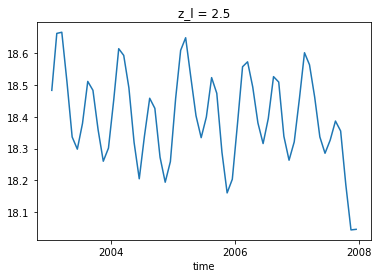

In [12]:
mean_sst.plot()

# Zonal average

Zonal average is just a simpler case, where averaging is only done over the longitude and can be written as:

$\large \overline{tracer} = \Sigma_{i} (tracer ~\times~ dxt ~\times~ wet) ~ / ~ \Sigma_{x} (dxt ~\times~ wet)$

and we can define the function as:

In [13]:
def zonal_mean(da, metrics):
    num = (da * metrics['dxt'] * metrics['wet']).sum(dim=['xh'])
    denom = (metrics['dxt'] * metrics['wet']).sum(dim=['xh'])
    return num/denom

In [14]:
zonalmean_sst = zonal_mean(sst, ds)

If we want to plot the zonal mean, we also need to have the correct latitude array and not the so-called nominal coordinate yh.
We can calculate it with the same formula:

In [15]:
correct_lat = zonal_mean(ds['geolat'], ds)

Then replace the bad latitudes with the correct ones in the data array:

In [16]:
zonalmean_sst = zonalmean_sst.rename({'yh': 'lat'})
zonalmean_sst['lat'] = correct_lat.values

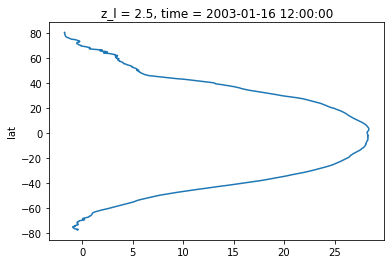

In [17]:
zonalmean_sst.isel(time=0).plot(y='lat')

# 3D average

Same method than for the 2D horizontal average, except we use volume instead of area and sum over 3 dimensions:

$\large \overline{tracer} = \Sigma_{i,j,k} (tracer ~\times~ dx ~\times~ dy ~\times~ dz ~\times~ mask) ~ / ~ \Sigma_{i,j,k} (dx ~\times~ dy ~\times~ dz ~\times~ mask)$

or in MOM6 terminology, this would be written (for a tracer) as:

$\large \overline{tracer} = \Sigma_{i,j,k} (tracer ~\times~ volcello ~\times~ wet) ~ / ~ \Sigma_{i,j,k} (volcello ~\times~ wet)$

the function is:

In [18]:
def global_mean(da, metrics):
    num = (da * metrics['volcello'] * metrics['wet']).sum(dim=['xh', 'yh', 'z_l'])
    denom = (metrics['volcello'] * metrics['wet']).sum(dim=['xh', 'yh', 'z_l'])
    return num / denom

In [19]:
temp_global = global_mean(ds['thetao'], ds)

Let's make the compute go a little faster with dask.

In [20]:
from dask.distributed import Client
from dask.distributed import LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:37457 Dashboard: http://127.0.0.1:42311/status,Cluster Workers: 4 Cores: 8 Memory: 33.22 GB


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40564 remote=tcp://127.0.0.1:37457>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40566 remote=tcp://127.0.0.1:37457>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40568 remote=tcp://127.0.0.1:37457>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40570 remote=tcp://127.0.0.1:37457>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40572 remote=tcp://127.0.0.1:37457>


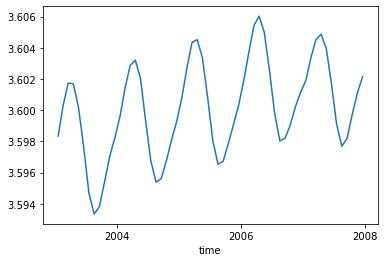

In [21]:
temp_global.plot()